In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [2]:
#imports .csv
full_exoplanets = "CSV_files/PS_2021HVD.csv"
#loads csv into dataframe
full_df = pd.read_csv(full_exoplanets)
full_df

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_locale,disc_facility,pl_controv_flag,pl_orbper,...,st_age,st_ageerr1,st_ageerr2,st_agelim,sy_dist,sy_disterr1,sy_disterr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,2,1,Eclipse Timing Variations,2015,Space,Kepler,0,416.000000,...,NaN,NaN,NaN,NaN,396.3320,6.38850,-6.38850,12.13760,0.003687,-0.003687
1,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,1,1,Imaging,2009,Ground,W. M. Keck Observatory,0,7336.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.39610,0.004861,-0.004861
2,51 Peg b,51 Peg,1,1,Radial Velocity,1995,Ground,Haute-Provence Observatory,0,4.231000,...,NaN,NaN,NaN,NaN,15.4614,0.02970,-0.02970,5.28647,0.002768,-0.002768
3,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Ground,Lick Observatory,0,14.600000,...,NaN,NaN,NaN,NaN,12.5855,0.01240,-0.01230,5.72973,0.000852,-0.000852
4,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Ground,Lick Observatory,0,14.465314,...,NaN,NaN,NaN,NaN,12.5855,0.01240,-0.01230,5.72973,0.000852,-0.000852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,nu Oph b,nu Oph,1,2,Radial Velocity,2012,Ground,Okayama Astrophysical Observatory,0,530.210000,...,0.65,0.17,-0.17,0.0,46.2107,1.73313,-1.73313,3.09653,0.016416,-0.016416
2088,nu Oph c,nu Oph,1,2,Radial Velocity,2012,Ground,Okayama Astrophysical Observatory,0,3184.830000,...,0.65,0.17,-0.17,0.0,46.2107,1.73313,-1.73313,3.09653,0.016416,-0.016416
2089,pi Men c,HD 39091,1,2,Transit,2018,Space,Transiting Exoplanet Survey Satellite (TESS),0,6.268340,...,5.20,1.10,-1.10,0.0,18.2702,0.02260,-0.02260,5.51280,0.001946,-0.001946
2090,pi Men c,HD 39091,1,2,Transit,2018,Space,Transiting Exoplanet Survey Satellite (TESS),0,6.267900,...,2.98,1.40,-1.30,0.0,18.2702,0.02260,-0.02260,5.51280,0.001946,-0.001946


In [3]:
full_df=full_df.drop(['sy_gaiamagerr1', 'sy_gaiamagerr2', 'sy_disterr1', 'sy_disterr2', 'st_agelim', 'st_ageerr2',
                      'st_ageerr1', 'pl_controv_flag','pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_radjerr1',
                      'pl_radjerr2', 'pl_radjlim','pl_masseerr2', 'pl_masselim', 'pl_masseerr1','pl_massjerr1',
                      'pl_massjerr2', 'pl_massjlim', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim','st_tefferr1', 'st_tefferr2',
                      'st_tefflim', 'st_masserr1', 'st_masserr2', 'st_masslim'], axis=1)

In [4]:
full_df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_locale', 'disc_facility', 'pl_orbper', 'pl_radj',
       'pl_masse', 'pl_massj', 'pl_eqt', 'st_spectype', 'st_teff', 'st_mass',
       'st_age', 'sy_dist', 'sy_gaiamag'],
      dtype='object')

In [5]:
full_df=full_df.rename(columns={'pl_name': 'Planet Name',
               'hostname':'Host Name',
               'sy_snum':'Number of Stars',
               'sy_pnum':'Number of Planets',
               'discoverymethod': 'Discovery Method',
               'disc_year':'Discovery Year',
               'disc_locale':'Discovery Locale',
               'disc_facility':'Discovery Facility',
               'pl_orbper':'Orbital Period [days]',
               'pl_radj':'Planet Radius [Jupiter Radius]',
               'pl_masse':'Planet Mass [Earth Mass]',
               'pl_massj':'Planet Mass [Jupiter Mass]',
               'pl_eqt':'Equilibrium Temperature [K]',
               'st_spectype':'Spectral Type',
               'st_teff':'Stellar Effective Temperature [K]',
               'st_mass':'Stellar Mass [Solar mass]',
               'st_age':'Stellar Age [Gyr]',
               'sy_dist':'Distance [pc]',
               'sy_gaiamag':'Gaia Magnitude'}
)

In [6]:
full_df.count()

Planet Name                          2092
Host Name                            2092
Number of Stars                      2092
Number of Planets                    2092
Discovery Method                     2092
Discovery Year                       2092
Discovery Locale                     2092
Discovery Facility                   2092
Orbital Period [days]                2092
Planet Radius [Jupiter Radius]       1938
Planet Mass [Earth Mass]             2092
Planet Mass [Jupiter Mass]           2092
Equilibrium Temperature [K]           863
Spectral Type                         467
Stellar Effective Temperature [K]    1693
Stellar Mass [Solar mass]            2027
Stellar Age [Gyr]                    1088
Distance [pc]                        2059
Gaia Magnitude                       2064
dtype: int64

In [7]:
full_df

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Locale,Discovery Facility,Orbital Period [days],Planet Radius [Jupiter Radius],Planet Mass [Earth Mass],Planet Mass [Jupiter Mass],Equilibrium Temperature [K],Spectral Type,Stellar Effective Temperature [K],Stellar Mass [Solar mass],Stellar Age [Gyr],Distance [pc],Gaia Magnitude
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,2,1,Eclipse Timing Variations,2015,Space,Kepler,416.000000,NaN,603.87700,1.90000,NaN,NaN,NaN,0.48,NaN,396.3320,12.13760
1,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,1,1,Imaging,2009,Ground,W. M. Keck Observatory,7336.500000,0.920,6657.48000,20.95000,2075.0,M8.5,2300.0,0.08,NaN,NaN,17.39610
2,51 Peg b,51 Peg,1,1,Radial Velocity,1995,Ground,Haute-Provence Observatory,4.231000,NaN,146.20180,0.46000,NaN,NaN,NaN,1.04,NaN,15.4614,5.28647
3,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Ground,Lick Observatory,14.600000,NaN,254.25000,0.80000,700.0,K0 IV-V,NaN,NaN,NaN,12.5855,5.72973
4,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Ground,Lick Observatory,14.465314,NaN,266.96600,0.84000,NaN,NaN,5250.0,0.90,NaN,12.5855,5.72973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,nu Oph b,nu Oph,1,2,Radial Velocity,2012,Ground,Okayama Astrophysical Observatory,530.210000,NaN,7057.73298,22.20600,NaN,K0 III,4886.0,2.70,0.65,46.2107,3.09653
2088,nu Oph c,nu Oph,1,2,Radial Velocity,2012,Ground,Okayama Astrophysical Observatory,3184.830000,NaN,7838.32346,24.66200,NaN,K0 III,4886.0,2.70,0.65,46.2107,3.09653
2089,pi Men c,HD 39091,1,2,Transit,2018,Space,Transiting Exoplanet Survey Satellite (TESS),6.268340,0.184,4.52000,0.01422,1147.0,NaN,5870.0,1.02,5.20,18.2702,5.51280
2090,pi Men c,HD 39091,1,2,Transit,2018,Space,Transiting Exoplanet Survey Satellite (TESS),6.267900,0.182,4.82000,0.01517,1170.0,G0 V,6037.0,1.09,2.98,18.2702,5.51280


In [8]:
star_specific= full_df.drop_duplicates('Host Name')
star_specific

,Planet Name,Host Name,Number of Stars,Number of Planets,Discovery Method,Discovery Year,Discovery Locale,Discovery Facility,Orbital Period [days],Planet Radius [Jupiter Radius],Planet Mass [Earth Mass],Planet Mass [Jupiter Mass],Equilibrium Temperature [K],Spectral Type,Stellar Effective Temperature [K],Stellar Mass [Solar mass],Stellar Age [Gyr],Distance [pc],Gaia Magnitude
0,2MASS J19383260+4603591 b,2MASS J19383260+4603591,2,1,Eclipse Timing Variations,2015,Space,Kepler,416.000000,NaN,603.87700,1.900,NaN,NaN,NaN,0.48,NaN,396.33200,12.13760
1,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,1,1,Imaging,2009,Ground,W. M. Keck Observatory,7336.500000,0.92,6657.48000,20.950,2075.0,M8.5,2300.0,0.08,NaN,NaN,17.39610
2,51 Peg b,51 Peg,1,1,Radial Velocity,1995,Ground,Haute-Provence Observatory,4.231000,NaN,146.20180,0.460,NaN,NaN,NaN,1.04,NaN,15.46140,5.28647
3,55 Cnc b,55 Cnc,2,5,Radial Velocity,1996,Ground,Lick Observatory,14.600000,NaN,254.25000,0.800,700.0,K0 IV-V,NaN,NaN,NaN,12.58550,5.72973
20,70 Vir b,70 Vir,1,1,Radial Velocity,1996,Ground,Lick Observatory,116.688400,NaN,2380.45000,7.490,NaN,NaN,5545.0,1.11,8.00,17.90110,4.76178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,eps Eri b,eps Eri,1,1,Radial Velocity,2000,Ground,Multiple Observatories,2502.100000,NaN,540.31100,1.700,NaN,NaN,NaN,0.85,1.00,3.20260,3.47719
2082,eps Ind A b,eps Ind A,3,1,Radial Velocity,2019,Ground,La Silla Observatory,16510.000000,NaN,1032.94750,3.250,NaN,K2 V,NaN,0.75,4.70,3.63857,4.34562
2083,kap CrB b,kap CrB,1,1,Radial Velocity,2007,Ground,Lick Observatory,1261.940000,NaN,635.66000,2.000,NaN,NaN,4871.0,NaN,NaN,30.06510,4.52428
2087,nu Oph b,nu Oph,1,2,Radial Velocity,2012,Ground,Okayama Astrophysical Observatory,530.210000,NaN,7057.73298,22.206,NaN,K0 III,4886.0,2.70,0.65,46.21070,3.09653


In [9]:
size = full_df.dropna(subset=['Planet Radius [Jupiter Radius]', 'Planet Mass [Jupiter Mass]'])
size.drop(size.index[size['Planet Radius [Jupiter Radius]'] == 0], inplace = True)
size.drop(size.index[size['Planet Radius [Jupiter Radius]'] >= 3], inplace = True)
size.drop(size.index[size['Planet Mass [Jupiter Mass]'] == 0], inplace = True)
size.drop(size.index[size['Planet Mass [Jupiter Mass]'] >= 40], inplace = True)
size.drop(size.index[size['Orbital Period [days]'] == 0], inplace = True)
#size = full_df.dropna(full_df['Planet Radius [Jupiter Radius]'])
size.count()

C:\Users\Crazyspaceman\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Planet Name                          1936
Host Name                            1936
Number of Stars                      1936
Number of Planets                    1936
Discovery Method                     1936
Discovery Year                       1936
Discovery Locale                     1936
Discovery Facility                   1936
Orbital Period [days]                1936
Planet Radius [Jupiter Radius]       1936
Planet Mass [Earth Mass]             1936
Planet Mass [Jupiter Mass]           1936
Equilibrium Temperature [K]           852
Spectral Type                         440
Stellar Effective Temperature [K]    1598
Stellar Mass [Solar mass]            1883
Stellar Age [Gyr]                    1035
Distance [pc]                        1909
Gaia Magnitude                       1924
dtype: int64

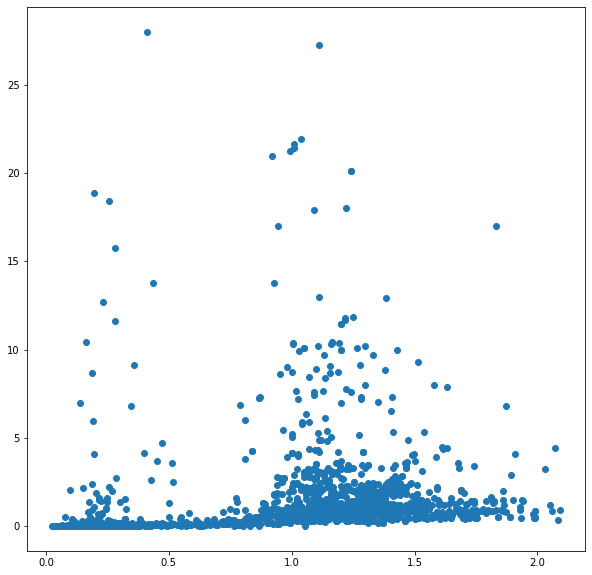

In [68]:
plt.figure(figsize=(10, 10))
plt.scatter(size['Planet Radius [Jupiter Radius]'], size['Planet Mass [Jupiter Mass]'])
plt.savefig('./Images/RadiusJvsMassJ')

In [11]:
small = full_df.dropna(subset=['Planet Radius [Jupiter Radius]', 'Planet Mass [Jupiter Mass]'])
small.drop(small.index[small['Planet Radius [Jupiter Radius]'] == 0], inplace = True)
small.drop(small.index[small['Planet Radius [Jupiter Radius]'] >= 1], inplace = True)
small.drop(small.index[small['Planet Mass [Jupiter Mass]'] == 0], inplace = True)
small.drop(small.index[small['Planet Mass [Jupiter Mass]'] >= .2], inplace = True)
small.drop(small.index[small['Orbital Period [days]'] == 0], inplace = True)
#size = full_df.dropna(full_df['Planet Radius [Jupiter Radius]'])
small.count()

Planet Name                          640
Host Name                            640
Number of Stars                      640
Number of Planets                    640
Discovery Method                     640
Discovery Year                       640
Discovery Locale                     640
Discovery Facility                   640
Orbital Period [days]                640
Planet Radius [Jupiter Radius]       640
Planet Mass [Earth Mass]             640
Planet Mass [Jupiter Mass]           640
Equilibrium Temperature [K]          206
Spectral Type                        121
Stellar Effective Temperature [K]    395
Stellar Mass [Solar mass]            637
Stellar Age [Gyr]                    255
Distance [pc]                        632
Gaia Magnitude                       640
dtype: int64

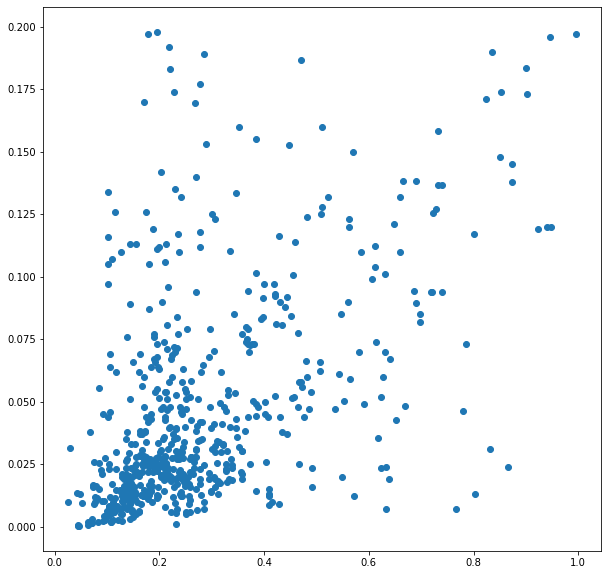

In [71]:
plt.figure(figsize=(10, 10))
plt.scatter((small['Planet Radius [Jupiter Radius]']), small['Planet Mass [Jupiter Mass]'])
plt.savefig('./Images/RadiusJvsMassJlow')

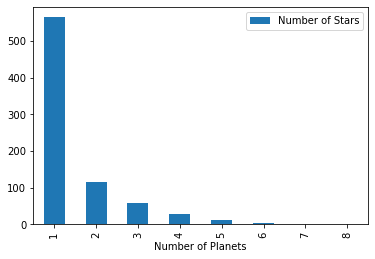

In [76]:
system_size = star_specific.groupby('Number of Planets').agg({'Number of Stars':'count'})
system_size.plot(kind='bar')
plt.savefig('./Images/planets')

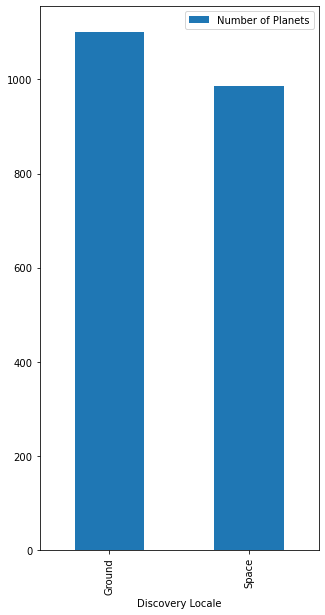

In [63]:
disc_loc = full_df [full_df ['Discovery Locale'] != 'Multiple Locales']
disc_loc = disc_loc [disc_loc ['Discovery Locale'] != 'Multiple Locale']
disc_loc_group= disc_loc.groupby('Discovery Locale').agg({'Number of Planets':'count'})
disc_loc_group.plot(kind='bar', figsize=(5,10))
plt.savefig('./Images/discLocation')

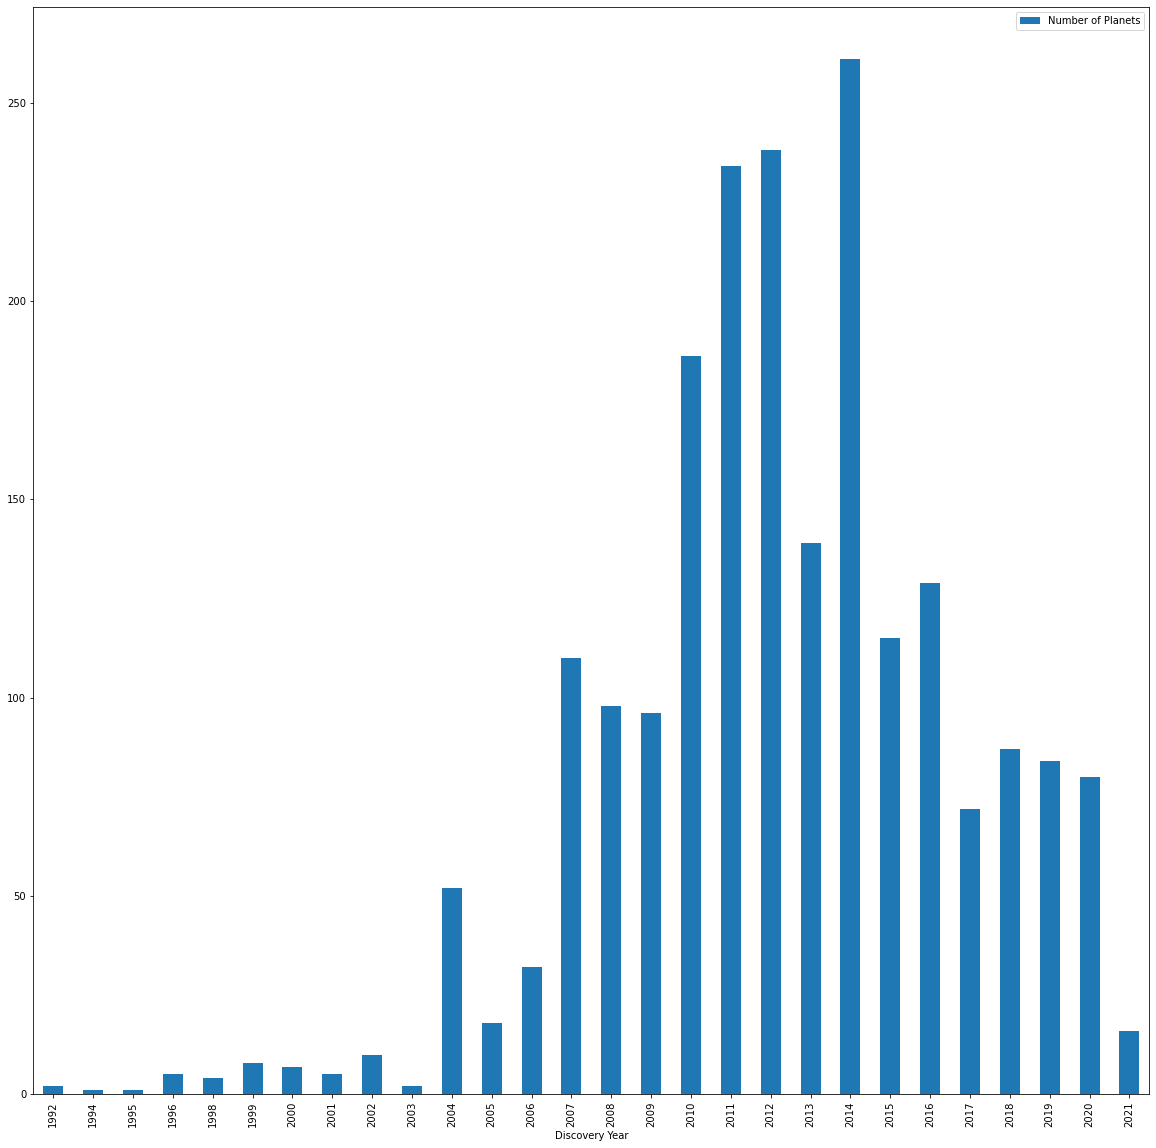

In [15]:
disc_year= full_df.groupby('Discovery Year').agg({'Number of Planets':'count'})

disc_year.plot(kind='bar', figsize=(20, 20))
#plt.figure(figsize=(20, 20))
plt.savefig('./Images/discYear')

In [16]:

star_specific_distance_outlier=star_specific.drop(star_specific.index[star_specific['Distance [pc]'] >= 7000])
star_specific_distance_outlier['Distance [pc]'].max()

6770.0

C:\Users\Crazyspaceman\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Crazyspaceman\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([196., 221., 133.,  65.,  58.,  40.,  22.,   7.,   8.,   3.,   5.,
          2.,   2.,   2.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([3.20260000e+00, 1.81872535e+02, 3.60542470e+02, 5.39212405e+02,
        7.17882340e+02, 8.96552275e+02, 1.07522221e+03, 1.25389215e+03,
        1.43256208e+03, 1.61123202e+03, 1.78990195e+03, 1.96857189e+03,
        2.14724182e+03, 2.32591176e+03, 2.50458169e+03, 2.68325163e+03,
        2.86192156e+03, 3.04059150e+03, 3.21926143e+03, 3.39793137e+03,
        3.57660130e+03, 3.75527124e+03, 3.93394117e+03, 4.11261110e+03,
        4.29128104e+03, 4.46995097e+03, 4.64862091e+03, 4.82729084e+03,
        5.00596078e+03, 5.18463072e+03, 5.36330065e+03, 5.54197059e+03,
        5.72064052e+03, 5.89931045e+03, 6.07798039e+03, 6.25665032e+03,
        6.43532026e+03, 6.61399020e+03, 6.79266013e+03, 6.97133007e+03,
      

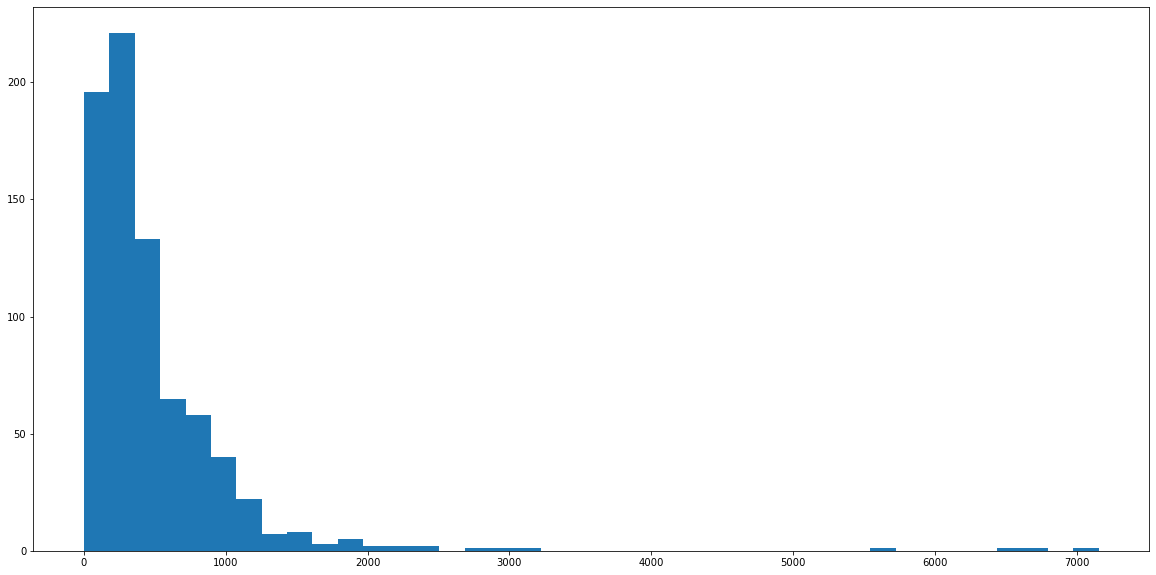

In [17]:
plt.figure(figsize=(20, 10))
plt.hist(star_specific['Distance [pc]'], bins=40)

(array([37., 43., 53., 41., 41., 41., 43., 24., 26., 25., 24., 18., 11.,
        20., 10.,  5.,  8.,  3.,  0.,  1.]),
 array([2.00000e-03, 7.46900e-01, 1.49180e+00, 2.23670e+00, 2.98160e+00,
        3.72650e+00, 4.47140e+00, 5.21630e+00, 5.96120e+00, 6.70610e+00,
        7.45100e+00, 8.19590e+00, 8.94080e+00, 9.68570e+00, 1.04306e+01,
        1.11755e+01, 1.19204e+01, 1.26653e+01, 1.34102e+01, 1.41551e+01,
        1.49000e+01]),
 <a list of 20 Patch objects>)

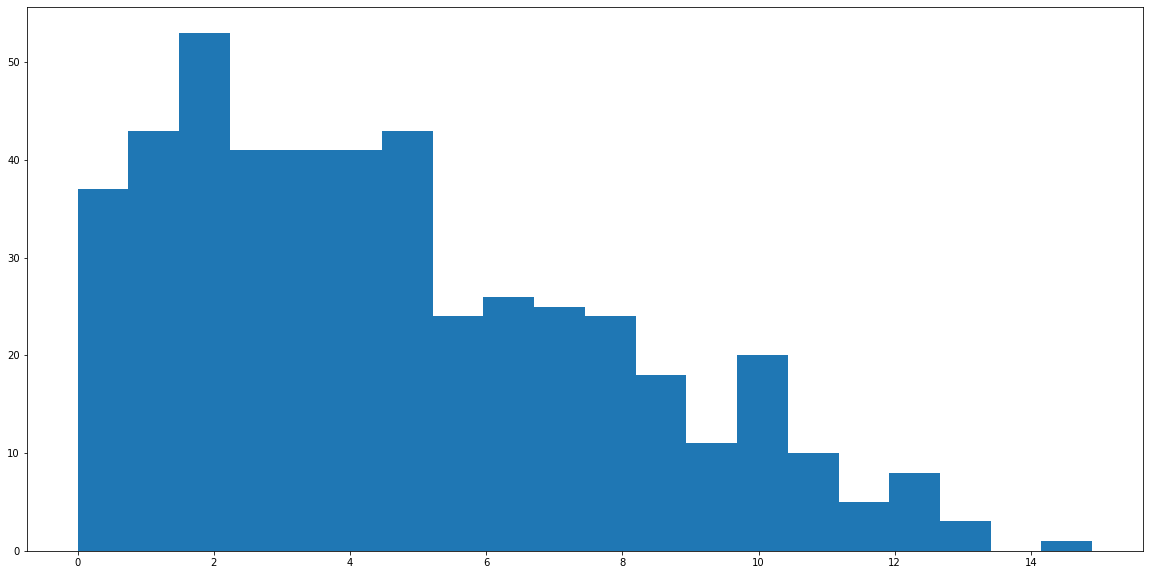

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(star_specific['Stellar Age [Gyr]'], bins=20)

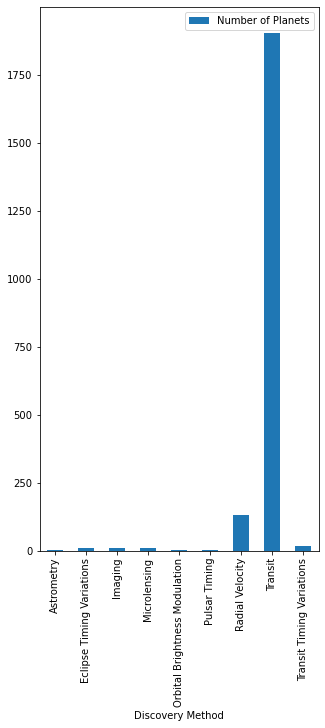

In [19]:
disc_meth= full_df.groupby('Discovery Method').agg({'Number of Planets':'count'})
disc_meth.plot(kind='bar', figsize=(5,10))

NameError: name 'plot' is not defined

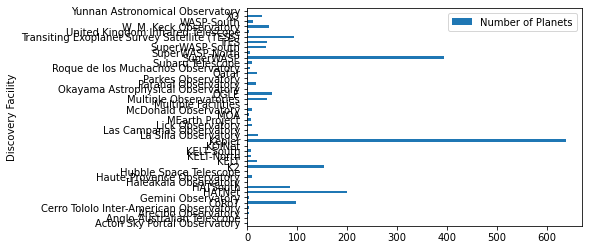

In [50]:
disc_fac= full_df.groupby('Discovery Facility').agg({'Number of Planets':'count'})
disc_fac.plot.barh(figsize=(20,5))
plt.savefig('./Images/discFacilityB')
#plt(figsize=(5,10))

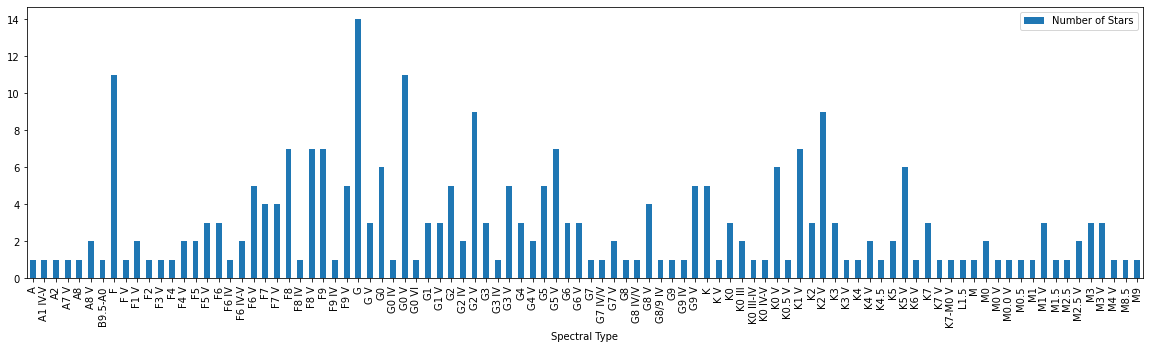

In [21]:
spec_ty =star_specific.groupby('Spectral Type').agg({'Number of Stars':'count'})
spec_ty.plot(kind='bar', figsize=(20,5))
plt.savefig('./Images/specType')

In [22]:
star_specific.columns

Index(['Planet Name', 'Host Name', 'Number of Stars', 'Number of Planets',
       'Discovery Method', 'Discovery Year', 'Discovery Locale',
       'Discovery Facility', 'Orbital Period [days]',
       'Planet Radius [Jupiter Radius]', 'Planet Mass [Earth Mass]',
       'Planet Mass [Jupiter Mass]', 'Equilibrium Temperature [K]',
       'Spectral Type', 'Stellar Effective Temperature [K]',
       'Stellar Mass [Solar mass]', 'Stellar Age [Gyr]', 'Distance [pc]',
       'Gaia Magnitude'],
      dtype='object')

In [23]:
star_specific=star_specific.drop([ 'Discovery Method', 'Discovery Year', 'Discovery Locale', 'Discovery Facility',
                                  'Orbital Period [days]', 'Planet Name', 'Planet Radius [Jupiter Radius]',
                                  'Planet Mass [Earth Mass]', 'Planet Mass [Jupiter Mass]','Equilibrium Temperature [K]'],
                                 axis=1)

In [24]:
star_specific=star_specific.set_index('Host Name')
html = star_specific.to_html() 
  
#write html to file 
text_file = open("star_data.html", "w") 
text_file.write(html) 
ext_file.close() 

In [25]:
star_specific.columns

Index(['index', 'Host Name', 'Number of Stars', 'Number of Planets',
       'Spectral Type', 'Stellar Effective Temperature [K]',
       'Stellar Mass [Solar mass]', 'Stellar Age [Gyr]', 'Distance [pc]',
       'Gaia Magnitude'],
      dtype='object')

In [26]:
html = full_df.to_html() 
  
#write html to file 
text_file = open("PD.html", "w") 
text_file.write(html) 
text_file.close() 

NameError: name 'ext_file' is not defined

In [28]:
full_df.columns

Index(['Planet Name', 'Host Name', 'Number of Stars', 'Number of Planets',
       'Discovery Method', 'Discovery Year', 'Discovery Locale',
       'Discovery Facility', 'Orbital Period [days]',
       'Planet Radius [Jupiter Radius]', 'Planet Mass [Earth Mass]',
       'Planet Mass [Jupiter Mass]', 'Equilibrium Temperature [K]',
       'Spectral Type', 'Stellar Effective Temperature [K]',
       'Stellar Mass [Solar mass]', 'Stellar Age [Gyr]', 'Distance [pc]',
       'Gaia Magnitude'],
      dtype='object')

In [41]:

df2 = full_df.groupby('Discovery Locale').apply(lambda x: x['Discovery Facility'].nunique())
df2

Discovery Locale
Ground              36
Multiple Locale      2
Multiple Locales     1
Space                6
dtype: int64

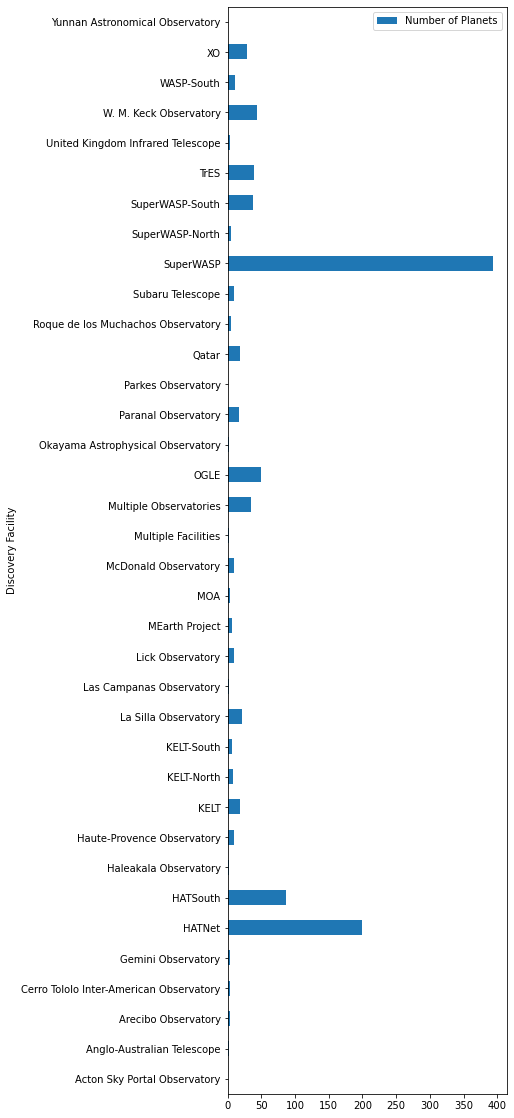

In [64]:
fac_earth=disc_loc[disc_loc ['Discovery Locale'] == 'Ground']
disc_fac_ground= fac_earth.groupby('Discovery Facility').agg({'Number of Planets':'count'})
disc_fac_ground.plot.barh(figsize=(5,20))

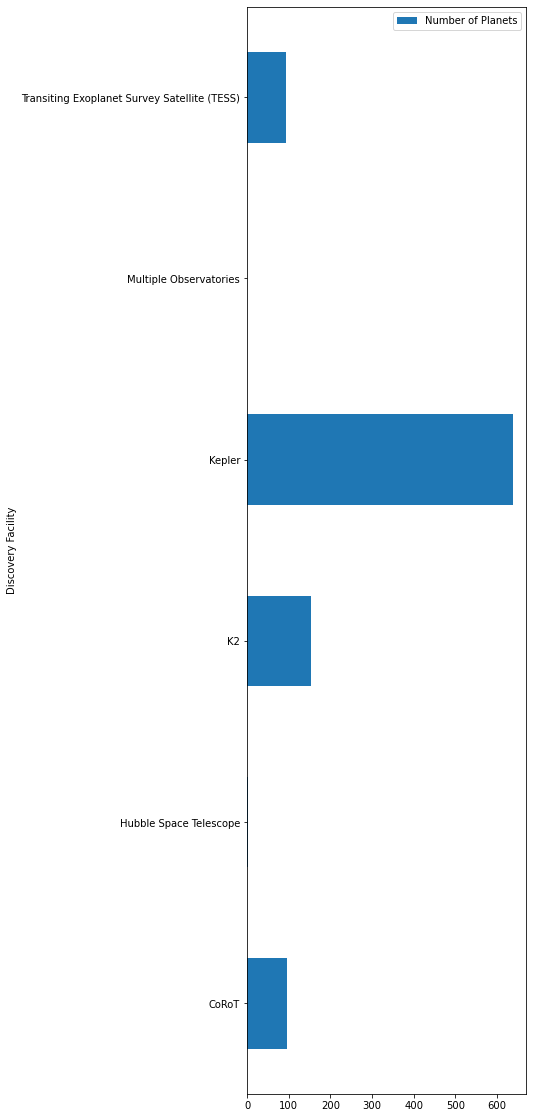

In [62]:
fac_space=full_df[full_df ['Discovery Locale'] == 'Space']
disc_fac_space= fac_space.groupby('Discovery Facility').agg({'Number of Planets':'count'})
disc_fac_space.plot.barh(figsize=(5,20))